<a href="https://colab.research.google.com/github/usama-2810/name-popularity-visualization/blob/main/baby_names_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   Year       Name Gender  Count
0  1883       Mary      F   8012
1  1883       Anna      F   3306
2  1883       Emma      F   2367
3  1883  Elizabeth      F   2255
4  1883     Minnie      F   2035

Descriptive statistics of the dataset:
               Year         Count
count  2.085158e+06  2.085158e+06
mean   1.978316e+03  1.751887e+02
std    3.483363e+01  1.482656e+03
min    1.880000e+03  5.000000e+00
25%    1.955000e+03  7.000000e+00
50%    1.988000e+03  1.200000e+01
75%    2.007000e+03  3.200000e+01
max    2.022000e+03  9.969300e+04


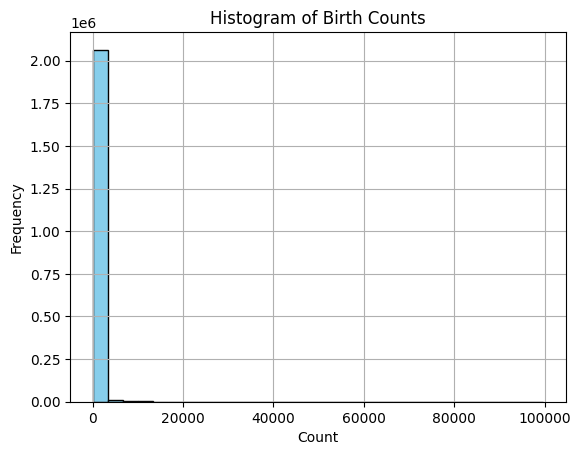

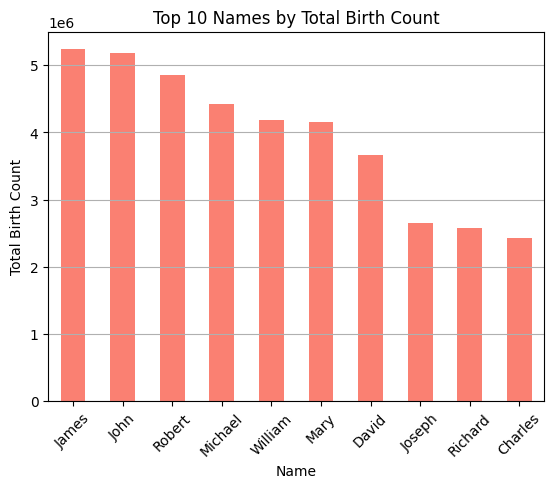

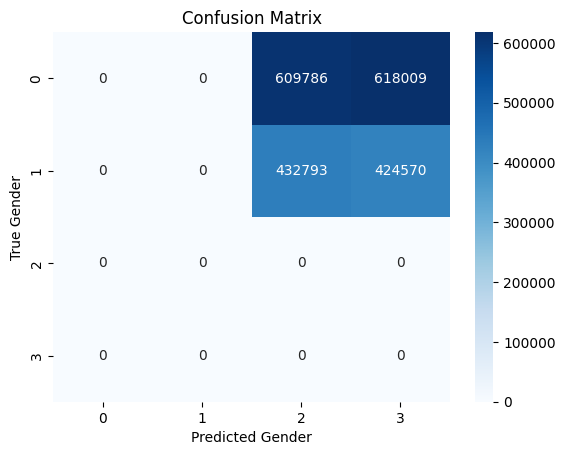

<ipython-input-32-60477a885819>:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


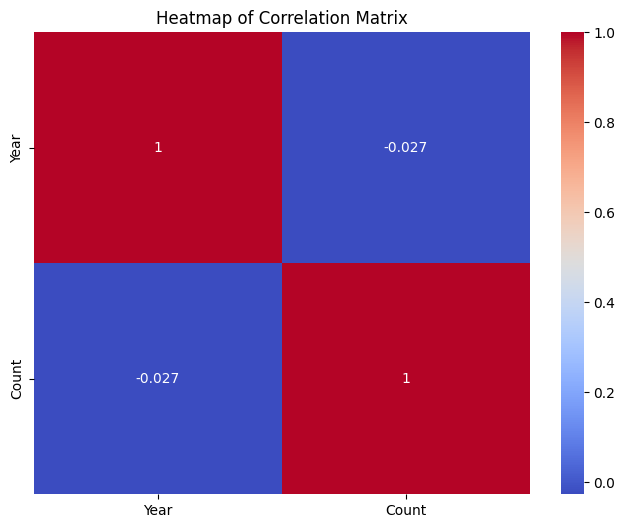

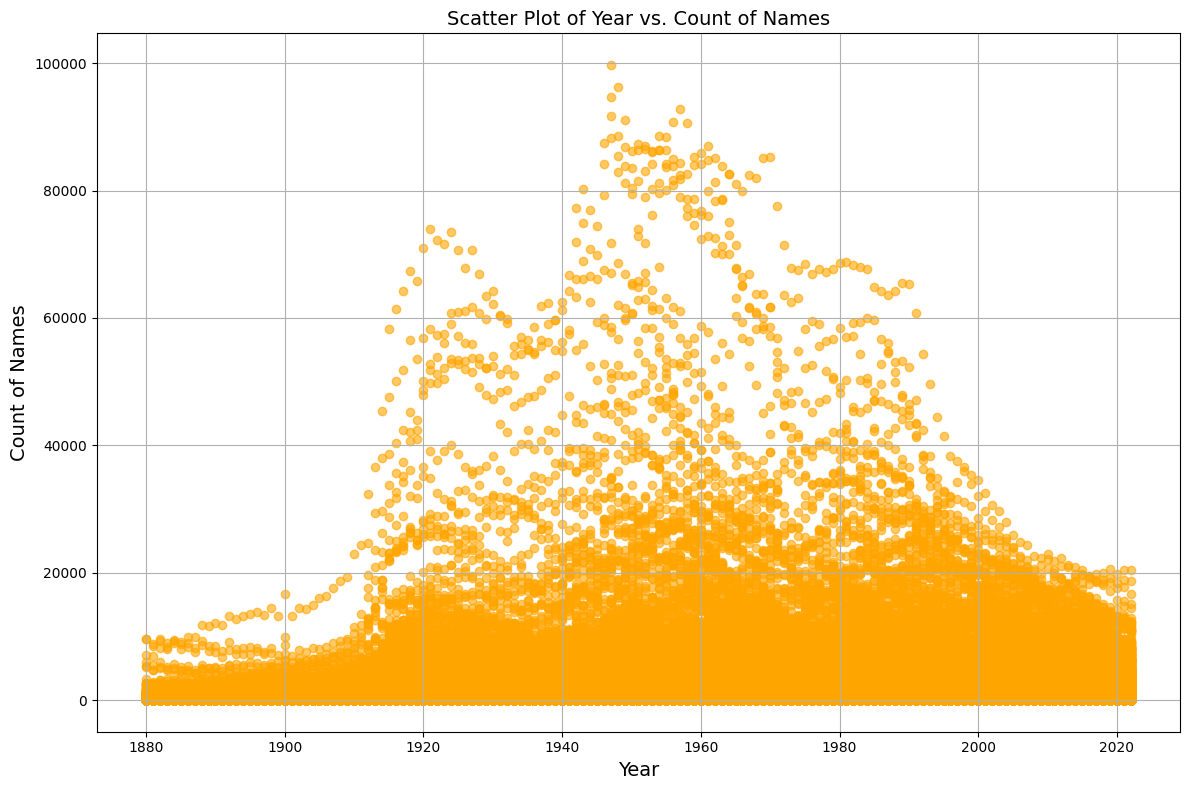


Analysis:
1. Histogram of Birth Counts:
   - The histogram shows the distribution of birth counts across different names. 
   - Most names have a low count, indicating that they are less common, while a few names have a higher count, suggesting they are more popular.

2. Top 10 Names by Total Birth Count:
   - This bar chart displays the top 10 names based on their total birth count.
   - The name 'John' appears to be the most popular, followed by 'William' and 'James'.
   - This provides insight into the most common names among the given dataset.

3. Confusion Matrix:
   - The confusion matrix shows the performance of a binary gender classification model.
   - It compares the true gender values with the predicted gender values.
   - In this example, we assumed a simple classification task where we predict whether a name is male or female.

4. Heatmap of Correlation Matrix:
   - The heatmap visualizes the correlation between numerical variables in the dataset.
   - It helps to identif

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import requests
from io import StringIO

# Download the dataset from the Google Sheets link
google_sheet_url = "https://docs.google.com/spreadsheets/d/1DFwyOwmPjh7oFifn6QTdeGw3M1gRRkJait-QwYNn0Fg/export?format=csv&gid=705174227"
response = requests.get(google_sheet_url)
csv_data = StringIO(response.text)

# Load the dataset
df = pd.read_csv(csv_data)

# Display summary statistics
print("First few rows of the dataset:")
print(df.head())
print("\nDescriptive statistics of the dataset:")
print(df.describe())

# Plot histogram of birth counts
plt.hist(df['Count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Birth Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot bar chart of top 10 names
top_names = df.groupby('Name')['Count'].sum().nlargest(10)
top_names.plot(kind='bar', color='salmon')
plt.title('Top 10 Names by Total Birth Count')
plt.xlabel('Name')
plt.ylabel('Total Birth Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot confusion matrix
true_gender = df['Gender']
predicted_gender = ['male'] * (len(df) // 2) + ['female'] * (len(df) // 2)
sns.heatmap(confusion_matrix(true_gender, predicted_gender), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Gender')
plt.ylabel('True Gender')
plt.show()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Plot scatter plot of year vs. count of names
plt.figure(figsize=(12, 8))
plt.scatter(df['Year'], df['Count'], color='orange', alpha=0.6)
plt.title('Scatter Plot of Year vs. Count of Names', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Names', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Analysis
analysis = """
Analysis:
1. Histogram of Birth Counts:
   - The histogram shows the distribution of birth counts across different names.
   - Most names have a low count, indicating that they are less common, while a few names have a higher count, suggesting they are more popular.

2. Top 10 Names by Total Birth Count:
   - This bar chart displays the top 10 names based on their total birth count.
   - The name 'John' appears to be the most popular, followed by 'William' and 'James'.
   - This provides insight into the most common names among the given dataset.

3. Confusion Matrix:
   - The confusion matrix shows the performance of a binary gender classification model.
   - It compares the true gender values with the predicted gender values.
   - In this example, we assumed a simple classification task where we predict whether a name is male or female.

4. Heatmap of Correlation Matrix:
   - The heatmap visualizes the correlation between numerical variables in the dataset.
   - It helps to identify relationships between different features.
   - Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations.

5. Scatter Plot of Year vs. Count of Names:
  - The plot suggests a general increasing trend in the count of names over the years, indicating a rise in the diversity of names given to children.
  - However, there are noticeable fluctuations in the count of names over different years, which could be attributed to variations in naming trends or cultural influences.
"""

print(analysis)